# Image Classifier using Tensorflow 2.x

Sup guys. In this project I will be presenting an image classifier using Tensorflow 2.x.
<br>
So far I've used it to classify insects, being: 
> * bee
> * cockroach
> * butterfly
> * ant
> * spider

but the algorithm is generalist, and can be used to classify any other object, just insert a dataset in the 'dataset' directory following the logical structure.
<br>
>I'm just at the beginning of my learning of Tensorflow, so there's a lot of things to improve on the algorithm.

### Instaling and Loading the Packages

In [1]:
# Python version
from platform import python_version
print('Python version used in this notebook:', python_version())

Python version used in this notebook: 3.9.7


In [2]:
# Imports
# Here are all the packages that will be used.
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib2 import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

Let's check if there is GPU available to perform Tensorflow operations

In [3]:
print('Number of GPUs available: {}'.format(len(tf.config.list_physical_devices('GPU'))))

Number of GPUs available: 1


In [ ]:
#Let's display the operations logs
tf.debugging.set_log_device_placement(True)

In [4]:
# Path to training data
path_training = Path("dataset/train")
# Path to test data
path_test = Path("dataset/test")
# Path to calculate classes lenght
path_len = Path("dataset/train")

In [5]:
# Listing folder contents
train_imgs = list(path_training.glob("*/*"))
# Lambda expression that extracts just the value with the path of each image
train_imgs = list(map(lambda x: str(x), train_imgs))
# Total training images
print('Total training images: {}'.format(len(train_imgs)))
# Classes lenght
len_class = len(list(path_len.glob("*/")))
print('Classes lenght: {}'.format(len_class))

Total training images: 196
Classes lenght: 5


In [6]:
train_imgs[0:5]

['dataset\\train\\Ant\\ant01.jpeg',
 'dataset\\train\\Ant\\ant02.jpg',
 'dataset\\train\\Ant\\ant03.png',
 'dataset\\train\\Ant\\ant04.png',
 'dataset\\train\\Ant\\ant05.jpg']

### Data Pre-Processing

The first step of the algorithm is to perform the pre-processing of data, such as:
> * Get the image labels
> * Data encoder using sklearn.preprocessing.LabelEncoder
> * Split data for training and testing using sklearn.model_selection.train_test_split

In [7]:
# Function that gets the label of each image
def extract_label(path_img):
    return path_img.split("\\")[-2]

In [8]:
# Applying the function
train_img_labels = list(map(lambda x: extract_label(x), train_imgs))

In [9]:
# Create a object
encoder = LabelEncoder()

In [10]:
# Apply the fit_transform
train_img_labels = encoder.fit_transform(train_img_labels)

In [11]:
# Display a sample
train_img_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

In [12]:
# Apply the One-Hot-Encoding on labels
train_img_labels = tf.keras.utils.to_categorical(train_img_labels)

In [13]:
# View a sample
train_img_labels[35:45]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [14]:
# We split the training data into two samples, training and validation
X_train, X_valid, y_train, y_valid = train_test_split(train_imgs, train_img_labels)

In [15]:
X_train[0:10]

['dataset\\train\\Ant\\ant15.jpg',
 'dataset\\train\\Butterfly\\butterfly30.jpg',
 'dataset\\train\\Cockroach\\cockroach32.jpg',
 'dataset\\train\\Ant\\ant38.jpg',
 'dataset\\train\\Spider\\spider29.jpg',
 'dataset\\train\\Spider\\spider01.jpg',
 'dataset\\train\\Cockroach\\cockroach05.jpg',
 'dataset\\train\\Ant\\ant29.jpg',
 'dataset\\train\\Cockroach\\cockroach20.jpg',
 'dataset\\train\\Ant\\ant19.jpg']

In [16]:
y_train[0:10]

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

### Dataset Augmentation

This step consists of increasing the dataset by creating copies of the images by applying
  some techniques like:
> * Rotate the image horizontally;
> * Rotate the image
> * Apply random zoom

In [17]:
# Resizing all images to 224 x 224 so that all input data have the same parameters
img_size = 224
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

In [18]:
# Creates the augmentation dataset object
data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(height_factor = (-0.3,-0.2)) ])

### Preparing the Data

In [19]:
# Hyperparameters
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

In [20]:
# Function to load and transform images
def load_transform(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [21]:
# Function for preparing data in TensorFlow format
def prepare_dataset(path, labels, train = True):

    # Prepare the data
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: load_transform(image, label)) 
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(100)
    dataset = dataset.batch(batch_size)

    # Se train = True aplica dataset augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)
  
    # If train = False repeats over the dataset and returns
    dataset = dataset.repeat()

    return dataset

In [22]:
# Create training dataset
train_dataset = prepare_dataset(X_train, y_train)

In [23]:
# Shape
img, label = next(iter(train_dataset))
print(img.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 5)


Cockroach


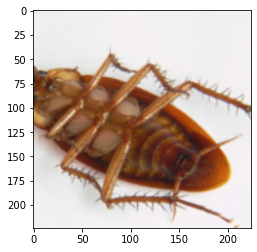

In [24]:
# Let's preview an image and a label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((img[0].numpy()/255).reshape(224,224,3))

In [25]:
# Create the validation dataset
valid_dataset = prepare_dataset(X_valid, y_valid, train = False)

In [26]:
# Shape
img, label = next(iter(valid_dataset))
print(img.shape) 
print(label.shape)

(32, 224, 224, 3)
(32, 5)


### Model Building

Now let's start the model building, compilation and execution step.

* The first step is to transfer learning using a network pre-trained by Tensorflow developers
> The EfficientNetB3 function returns a Keras image classification model, optionally loaded with weights pre-trained on ImageNet.

In [27]:
# Loading a pre-trained model
pre_model = EfficientNetB3(input_shape = (224,224,3), include_top = False)

In [28]:
# Adding our own layers to pre_model
model = tf.keras.Sequential([pre_model,
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(len_class, activation = 'softmax')])

In [29]:
# Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 7685      
                                                                 
Total params: 10,791,220
Trainable params: 10,703,917
Non-trainable params: 87,303
_________________________________________________________________


In [30]:
# Hyperparameters
lr = 0.001
beta1 = 0.9
beta2 = 0.999
ep = 1e-07

> An overview of ADAM (Adaptive Moment Estimation)
>> Link: https://ruder.io/optimizing-gradient-descent/

> An overview of Cross Entropy
> > Link: https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

In [31]:
# Model compilation
model.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'categorical_crossentropy', 
               metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')])

> Let's train the model for just one season and check the metrics.

#### _Train model_

Unfortunately I had problems running the GPU training, so I used the CPU in the codes: with tf.device('/CPU:0')
> Remove this code to run with the GPU

In [32]:
%%time
with tf.device('/CPU:0'):
    history = model.fit(train_dataset,
                     steps_per_epoch = len(X_train)//batch_size,
                     epochs = 1,
                     validation_data = valid_dataset,
                     validation_steps = len(y_train)//batch_size)

4/4 [==============================] - 97s 15s/step - loss: 0.9568 - accuracy: 0.6484 - precision: 0.9643 - recall: 0.4219 - val_loss: 0.2313 - val_accuracy: 0.9796 - val_precision: 1.0000 - val_recall: 0.8980
Wall time: 1min 37s


> We will train the model for another 40 epochs in order to improve performance and apply some techniques to avoid overfitting.

In [33]:
#We no longer need the pre_model
model.layers[0].trainable = False

> Let's create a checkpoint to save the best model among all the epios

In [34]:
# Checkpoint
checkpoint1 = tf.keras.callbacks.ModelCheckpoint("modelo/best_model.h5", 
                                                verbose = 1, 
                                                save_best_only = True, 
                                                save_weights_only = True)

# Checkpoint
checkpoint2 = tf.keras.callbacks.ModelCheckpoint("modelo/last_model.h5", 
                                                verbose = 0, 
                                                save_best_only = False,
                                                save_weights_only = True,
                                                save_freq='epoch')

> Early stop serves to stop training if accuracy decreases after the threshold established as a parameter.

In [35]:
# Early stop
early_stop = tf.keras.callbacks.EarlyStopping(patience = 10) 

In [36]:
# Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 7, 7, 1536)       10783535  
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 7685      
                                                                 
Total params: 10,791,220
Trainable params: 7,685
Non-trainable params: 10,783,535
_________________________________________________________________


In [ ]:
# My GPU Information
!nvidia-smi

In [37]:
%%time
with tf.device('/CPU:0'):
    history = model.fit(train_dataset,
                     steps_per_epoch = len(X_train)//batch_size,
                     epochs = 40,
                     validation_data = valid_dataset,
                     validation_steps = len(y_train)//batch_size,
                     callbacks = [checkpoint1, checkpoint2])

Epoch 1/40
4/4 [==============================] - ETA: 0s - loss: 0.0531 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 
Epoch 00001: val_loss improved from inf to 0.06073, saving model to modelo\best_model.h5
4/4 [==============================] - 79s 18s/step - loss: 0.0531 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9796 - val_precision: 0.9796 - val_recall: 0.9796
Epoch 2/40
4/4 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9739 - precision: 0.9739 - recall: 0.9739 
Epoch 00002: val_loss did not improve from 0.06073
4/4 [==============================] - 61s 18s/step - loss: 0.0716 - accuracy: 0.9739 - precision: 0.9739 - recall: 0.9739 - val_loss: 0.4112 - val_accuracy: 0.9184 - val_precision: 0.9184 - val_recall: 0.9184
Epoch 3/40
4/4 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 00003: val_loss did not improve from 0.06073


### Model Evaluation

In [38]:
# To load the weights, we need to unfreeze the layers.
model.layers[0].trainable = True

In [47]:
# Load checkpoint weights and re-evaluate
model.load_weights("modelo/best_model.h5")

In [40]:
# Loading and preparing test data
path_test = list(path_test.glob("*/*"))
test_imgs = list(map(lambda x: str(x), path_test))
test_img_labels = list(map(lambda x: extract_label(x), test_imgs))
test_img_labels = encoder.fit_transform(test_img_labels)
test_img_labels = tf.keras.utils.to_categorical(test_img_labels)
test_image_paths = tf.convert_to_tensor(test_imgs)
test_img_labels = tf.convert_to_tensor(test_img_labels)

In [41]:
# Image decode function
def decode_images(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [42]:
# Create the test dataset
test_dataset = (tf.data.Dataset
                 .from_tensor_slices((test_imgs, test_img_labels))
                 .map(decode_images)
                 .batch(batch_size))

In [43]:
# Shape
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 5)


Ant


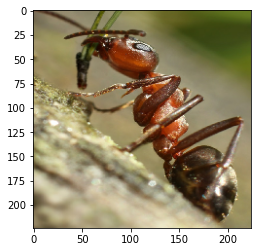

In [44]:
# View a test image
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [48]:
# Evaluate the model
with tf.device('/CPU:0'):
    loss, acc, prec, rec = model.evaluate(test_dataset)

2/2 [==============================] - 2s 117ms/step - loss: 0.1332 - accuracy: 0.9697 - precision: 0.9688 - recall: 0.9394


In [49]:
print("Accuracy: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

Accuracy:  0.9696969985961914
Precision:  0.96875
Recall:  0.939393937587738


### Predictions with the Trained Model

Finally, let's test the model in practice and see if it performed well.

In [50]:
# Function to load a new image
def load_img(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0) 
    return image

In [51]:
# Prediction function
def make_prevision(image_path, model, enc):
    image = load_img(image_path)
    prediction = model.predict(image)
    pred = np.argmax(prediction, axis = 1) 
    return enc.inverse_transform(pred)[0] 

### Some tests

The predicted object was: Cockroach


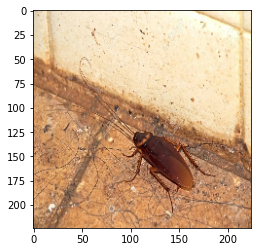

In [52]:
with tf.device('/CPU:0'):
    # Prevision
    prev = make_prevision("imagens/teste2.jpg", model, encoder)
    print('The predicted object was: {}'.format(prev))

The predicted object was: Bee


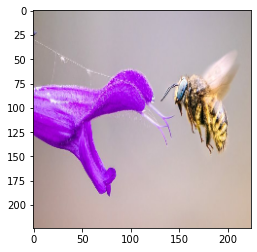

In [53]:
with tf.device('/CPU:0'):
    # Prevision
    prev = make_prevision("imagens/teste4.jpg", model, encoder)
    print('The predicted object was: {}'.format(prev))

The predicted object was: Butterfly


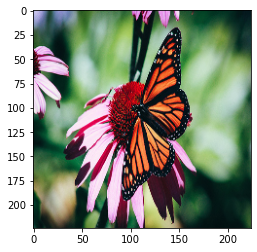

In [54]:
with tf.device('/CPU:0'):
    # Prevision
    prev = make_prevision("imagens/teste5.jpg", model, encoder)
    print('The predicted object was: {}'.format(prev))

The predicted object was: Ant


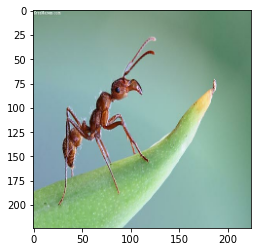

In [55]:
with tf.device('/CPU:0'):
    # Prevision
    prev = make_prevision("imagens/teste7.jpg", model, encoder)
    print('The predicted object was: {}'.format(prev))

The predicted object was: Spider


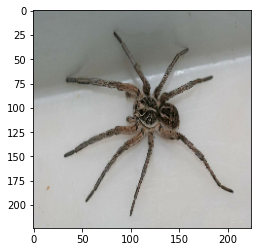

In [56]:
with tf.device('/CPU:0'):
    # Prevision
    prev = make_prevision("imagens/teste9.jpg", model, encoder)
    print('The predicted object was: {}'.format(prev))